<a href="https://colab.research.google.com/github/Ihzaamirunnadif/4112322007_Tugas-Tuning-Model/blob/main/4112322007_Ihza_Amirunnadif_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Ihza Amirunnadif

NIM   : 4112322007

Prodi : Statistika Terapan dan Komputasi

# Dataset

Dataset ini berisi informasi mengenai pengajuan pinjaman oleh individu, dengan berbagai fitur
yang dapat memengaruhi keputusan persetujuan pinjaman. Tujuan utama dari dataset ini
adalah untuk membangun model Machine Learning yang dapat memprediksi apakah suatu
pengajuan pinjaman akan disetujui (Loan_Approval = 1) atau ditolak (Loan_Approval = 0)
berdasarkan karakteristik pemohon.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [ ]:
# Membaca dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/TUGAS ML/loan_approval_dataset.csv'
df = pd.read_csv(file_path)
display(df.head())
print(df.shape)
print(df.dtypes)

,Age,Income,Education_Level,Credit_Score,Loan_Amount,Loan_Purpose,Loan_Approval
0,56,24000,PhD,333,26892,Personal,0
1,46,90588,Master,316,26619,Home,1
2,32,113610,PhD,452,1281,Personal,1
3,60,117856,High School,677,28420,Personal,0
4,25,58304,PhD,641,16360,Car,0


(500, 7)
Age                 int64
Income              int64
Education_Level    object
Credit_Score        int64
Loan_Amount         int64
Loan_Purpose       object
Loan_Approval       int64
dtype: object


# 1. Eksplorasi Data

## Identifikasi Missing Values

In [ ]:
# Mengecek nilai yang hilang
missing_values = df.isnull().sum()
print("Jumlah nilai hilang pada setiap kolom:\n", missing_values)

Jumlah nilai hilang pada setiap kolom:
 Age                0
Income             0
Education_Level    0
Credit_Score       0
Loan_Amount        0
Loan_Purpose       0
Loan_Approval      0
dtype: int64


Hasil menunjukkan bahwa semua kolom pada dataset ini lengkap, tanpa ada nilai yang hilang (missing). Artinya, setiap baris memiliki data yang lengkap untuk semua kolom, seperti "Age", "Income", "Education_Level", "Credit_Score", "Loan_Amount", "Loan_Purpose", dan "Loan_Approval".

## Visualisasi data

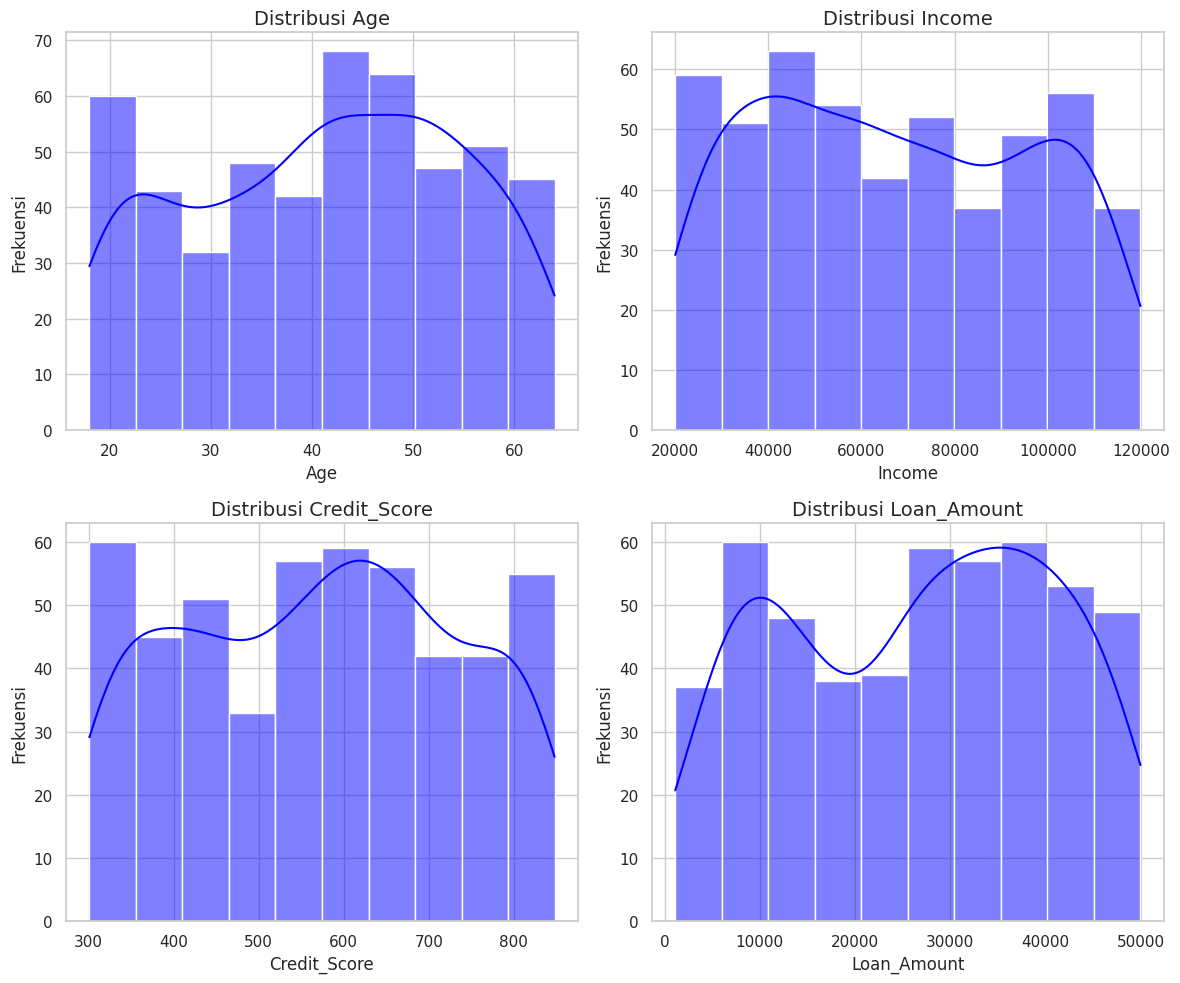

<ipython-input-158-fb0aeb87d9b6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Loan_Purpose"], order=df["Loan_Purpose"].value_counts().index, palette="cool", ax=ax)


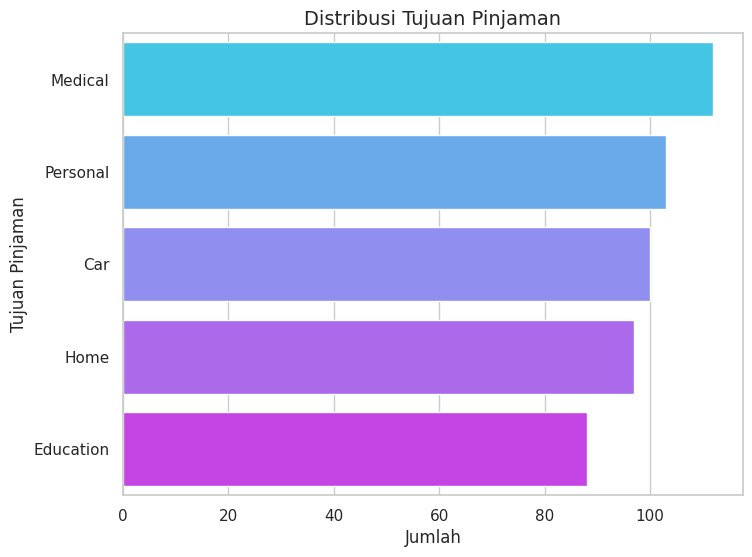

In [ ]:
# Visualisasi data numerik
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
kolom_numerik = ["Age", "Income", "Credit_Score", "Loan_Amount"]

for ax, kolom in zip(axes.flatten(), kolom_numerik):
    sns.histplot(df[kolom], kde=True, ax=ax, color='blue')
    ax.set_title(f'Distribusi {kolom}', fontsize=14)
    ax.set_xlabel(kolom)
    ax.set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Visualisasi data kategorikal
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(y=df["Loan_Purpose"], order=df["Loan_Purpose"].value_counts().index, palette="cool", ax=ax)
ax.set_title("Distribusi Tujuan Pinjaman", fontsize=14)
ax.set_xlabel("Jumlah")
ax.set_ylabel("Tujuan Pinjaman")
plt.show()


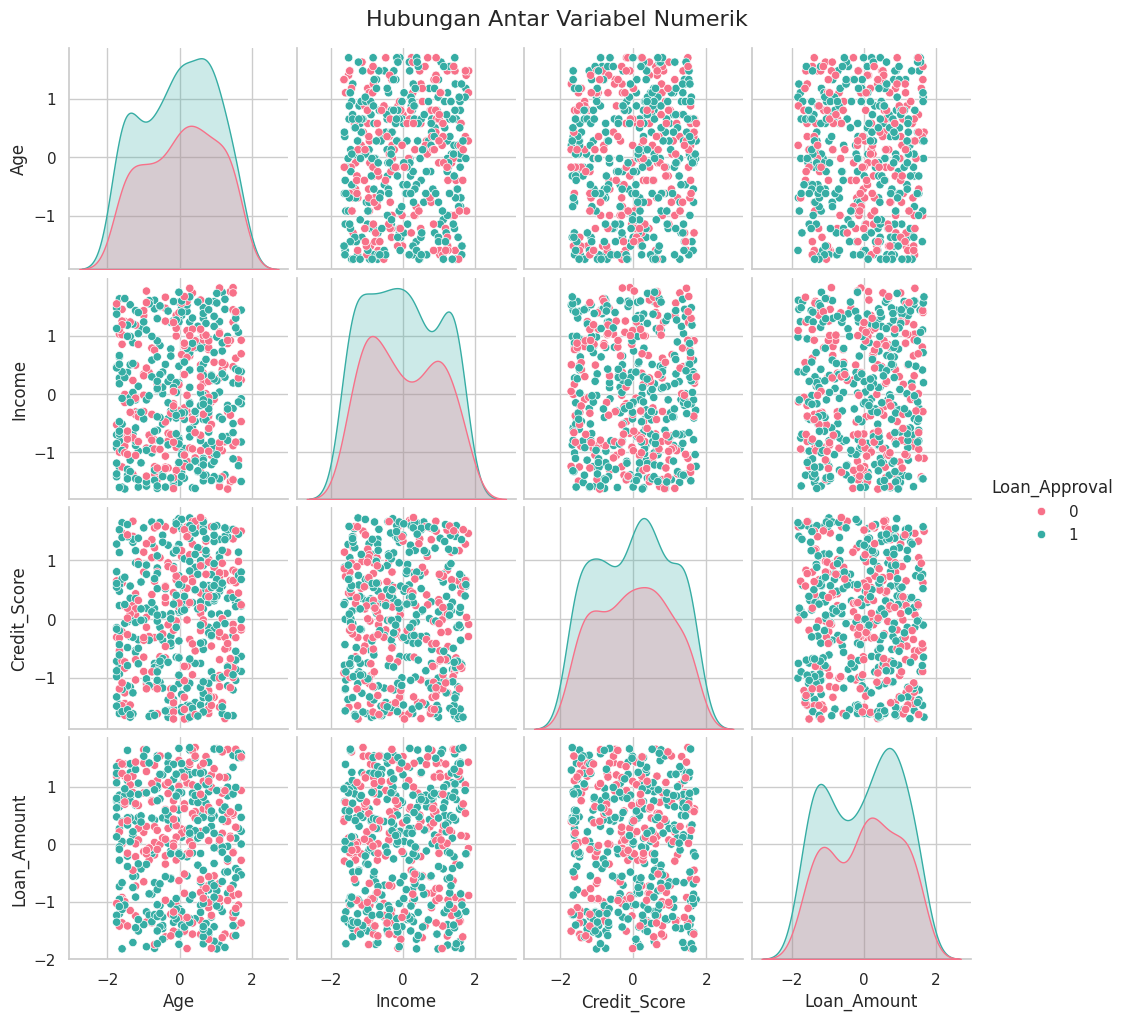

<ipython-input-183-b05267dcbf9a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Loan_Amount"], palette="Set2", ax=ax)


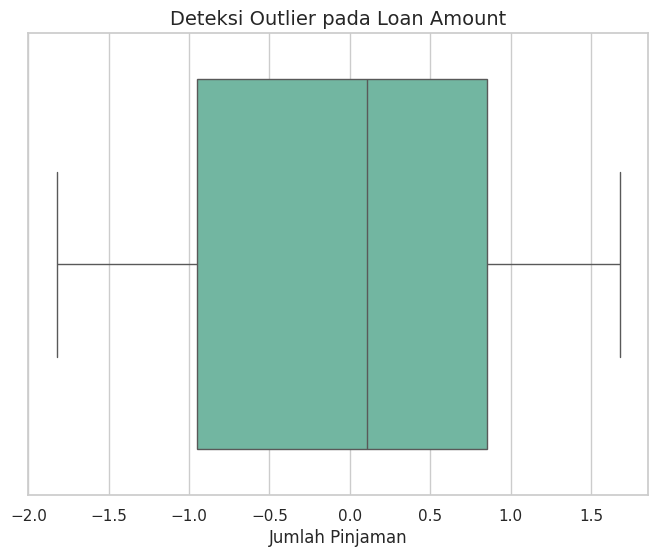

In [183]:
# Visualisasi hubungan antar variabel numerik
sns.pairplot(df, vars=["Age", "Income", "Credit_Score", "Loan_Amount"], hue="Loan_Approval", palette="husl")
plt.suptitle("Hubungan Antar Variabel Numerik", y=1.02, fontsize=16)
plt.show()

# Boxplot untuk mendeteksi outlier
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["Loan_Amount"], palette="Set2", ax=ax)
ax.set_title("Deteksi Outlier pada Loan Amount", fontsize=14)
ax.set_xlabel("Jumlah Pinjaman")
plt.show()

# 2. Pemrosesan Data

## Melakukan encoding pada fitur kategorikal

In [ ]:
# Menggunakan LabelEncoder untuk mengubah data kategorikal menjadi data numerik
kolom_kategorikal = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for kolom in kolom_kategorikal:
    df[kolom] = encoder.fit_transform(df[kolom])

## Melakukan feature scaling pada fitur numerik

In [ ]:
# Menggunakan StandardScaler untuk meratakan skala data numerik
scaler = StandardScaler()
df[kolom_numerik] = scaler.fit_transform(df[kolom_numerik])

## Membagi dataset menjadi training set  set (80%) dan testing set (20%)

In [ ]:
# Menggunakan train_test_split
X = df.drop("Loan_Approval", axis=1)
y = df["Loan_Approval"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Pemilihan dan Training Model

## Pemilihan algoritma machine learning yang berbeda



1. Random Forest

    Random Forest dipilih karena merupakan ensemble method yang mampu menangani data dengan banyak fitur dan memberikan hasil yang akurat dengan overfitting yang minimal. Keunggulannya terletak pada kemampuan menangani data numerik maupun kategorikal dengan baik.

2. Support Vector Machine (SVM)

    SVM Dipilih karena kemampuannya dalam menangani dataset dengan dimensi tinggi dan memaksimalkan margin antara kelas-kelas dalam data. SVM ini cocok untuk dataset dengan distribusi data yang tidak merata.




## Melakukan Training model menggunakan dataset yang telah diproses

In [ ]:
# Model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Akurasi Random Forest: {rf_accuracy:.2f}")

# Model Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"Akurasi SVM: {svm_accuracy:.2f}")



Akurasi Random Forest: 0.50
Akurasi SVM: 0.63


# 4. Evaluasi Model

## menghitung dan membandingkan metric evaluasi dari ketiga model

In [ ]:
#Evaluasi model menggunakan metrik akurasi, presisi, recall, dan F1-score
print("\nEvaluasi Model:")
models = {
    "Random Forest": rf_predictions,
    "SVM": svm_predictions
}

for model_name, predictions in models.items():
    print(f"\n{model_name}:")
    print(classification_report(y_test, predictions, target_names=["Not Approved", "Approved"]))

# Pemilihan model terbaik berdasarkan F1-score
f1_scores = {
    "Random Forest": f1_score(y_test, rf_predictions, average='weighted'),
    "SVM": f1_score(y_test, svm_predictions, average='weighted')
}

best_model_name = max(f1_scores, key=f1_scores.get)
print(f"\nModel dengan F1-score terbaik: {best_model_name}")


Evaluasi Model:

Random Forest:
              precision    recall  f1-score   support

Not Approved       0.29      0.24      0.26        37
    Approved       0.59      0.65      0.62        63

    accuracy                           0.50       100
   macro avg       0.44      0.45      0.44       100
weighted avg       0.48      0.50      0.49       100


SVM:
              precision    recall  f1-score   support

Not Approved       0.00      0.00      0.00        37
    Approved       0.63      1.00      0.77        63

    accuracy                           0.63       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.40      0.63      0.49       100


Model dengan F1-score terbaik: Random Forest


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Memilih model dengan peforma terbaik

In [ ]:
# Menyiapkan model dengan performa terbaik untuk tahap tuning
if best_model_name == "Random Forest":
    best_model = rf_model
elif best_model_name == "SVM":
    best_model = svm_model
else:
    best_model = lr_model

print(f"\nModel {best_model_name} siap untuk tahap tuning.")


Model Random Forest siap untuk tahap tuning.


# 5. Tuning Model

## Menggunakan Grid Search atau random search

In [179]:
# Tuning hyperparameter menggunakan GridSearchCV
grid_search = GridSearchCV(
    estimator=best_model,
    param_grid=param_grid,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Hasil tuning
best_params = grid_search.best_params_
best_model_tuned = grid_search.best_estimator_
print(f"\nHyperparameter terbaik untuk {best_model_name}: {best_params}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti


Hyperparameter terbaik untuk Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## Menampilkan kombinasi hyperparameter terbaik

In [180]:
# Hyperparameter grid untuk masing-masing model
if best_model_name == "Random Forest":
    param_grid = {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "max_features": ["auto", "sqrt", "log2"],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
    }
elif best_model_name == "SVM":
    param_grid = {
        "C": [0.1, 1, 10, 100],
        "kernel": ["linear", "rbf", "poly"],
        "gamma": ["scale", "auto"],
    }
else:
    raise ValueError("Model terbaik tidak dikenali.")

# 6. Perbandingan peforma

## Membandingkan hasil evaluasi model sebelum dan sesudah tuning

In [182]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Fungsi evaluasi model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "AUC-ROC": roc_auc
    }

# Evaluasi sebelum tuning
initial_evaluation = evaluate_model(y_test, best_model.predict(X_test), f"{best_model_name} (Initial)")

# Evaluasi sesudah tuning
tuned_evaluation = evaluate_model(y_test, best_model_tuned.predict(X_test), f"{best_model_name} (Tuned)")

# Membandingkan hasil dalam DataFrame
evaluation_comparison = pd.DataFrame([initial_evaluation, tuned_evaluation])
display(evaluation_comparison)


,Model,Accuracy,Precision,Recall,F1-score,AUC-ROC
0,Random Forest (Initial),0.50,0.594203,0.650794,0.621212,0.447018
1,Random Forest (Tuned),0.53,0.617647,0.666667,0.641221,0.481982


## penjelasan

Setelah dilakukan tuning hyperparameter pada model Random Forest, terdapat peningkatan performa yang meskipun kecil, tetap menunjukkan dampak positif dari proses optimasi. Akurasi model meningkat dari 50% menjadi 53%, yang berarti kemampuan model untuk memprediksi hasil yang benar sedikit lebih baik setelah tuning. Precision juga meningkat dari 59% menjadi 62%, menunjukkan bahwa model semakin baik dalam menghindari kesalahan positif palsu (false positive). Selain itu, recall naik dari 65% menjadi 67%, yang mencerminkan kemampuan model dalam menangkap lebih banyak kasus positif yang sebenarnya. F1-score, yang merupakan kombinasi dari precision dan recall, mengalami peningkatan dari 62% menjadi 64%, sehingga model menjadi lebih seimbang dalam performa prediksi.

Namun, meskipun ada peningkatan dalam metrik evaluasi lainnya, nilai AUC-ROC hanya naik sedikit dari 0.44 menjadi 0.48. Ini menunjukkan bahwa kemampuan model dalam membedakan antara kelas positif dan negatif masih kurang optimal.